# Figure 1 B
Overview of the top percent discovery regions and how many altered connections they relate to.

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sbn
import nibabel as nib
import matplotlib as mpl
from scipy import io as sio
from matplotlib import pyplot as plt

In [3]:
# Paths
root_p = '/project/6008022/su_cm/paper_16p22q/'
dc22_p = os.path.join(root_p, 'glm/22q/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat')
dp22_p = os.path.join(root_p, 'glm/22q/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat')
dc16_p = os.path.join(root_p, 'glm/16p/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat')
dp16_p = os.path.join(root_p, 'glm/16p/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat')

labels_p = '/home/surchs/sim_big/ATLAS/MIST/Parcel_Information/MIST_64.csv'
hier_p = '/home/surchs/sim_big/ATLAS/MIST/Hierarchy/MIST_PARCEL_ORDER.csv'
temp_p = '/project/6003287/ATLAS/MIST/Parcellations/MIST_64.nii.gz'
figure_p = '/project/6008022/su_cm/paper_16p22q/figures/fig1/'

In [4]:
# Load the MIST64 template
temp_i = nib.load(temp_p)
mist64 = temp_i.get_data()
# Get the parcel info
label = pd.read_csv(labels_p, delimiter=';')
hier = pd.read_csv(hier_p)

In [5]:
# Get all the patterns and pd
dc16_pd = np.array(sio.loadmat(dc16_p)['perc_discovery']).squeeze()
dp16_pd = np.array(sio.loadmat(dp16_p)['perc_discovery']).squeeze()
dc16_fdr = np.array(sio.loadmat(dc16_p)['fdr']).squeeze()
dp16_fdr = np.array(sio.loadmat(dp16_p)['fdr']).squeeze()

## Make the plot

In [6]:
# Set the values to what I am looking for
pd = dc16_pd
fdr = dc16_fdr

In [7]:
# Sort it and then revert the order so they go from big to small
ind = np.argsort(pd)[::-1]
# Compute the percent of significant connections as a function of the number of
# regions
fdr_mask = np.copy(fdr)
fdr_mask[np.tril(np.ones((64,64)).astype(bool),-1)] = 1
total_sig = np.sum(fdr[np.triu(np.ones((64,64)).astype(bool))]<0.05)
perc_top = np.zeros(64)
perc_joint = np.zeros(64)
for i in range(64):
    top_mask = np.zeros_like(fdr).astype(bool)
    joint_mask = np.zeros_like(fdr).astype(bool)
    top_mask[ind[:i+1], :] = True
    top_mask[:, ind[:i+1]] = True
    joint_mask[np.meshgrid(ind[:i+1], ind[:i+1])] = True
    perc_top[i] = np.sum(fdr_mask[top_mask]<0.05)/total_sig
    perc_joint[i] = np.sum(fdr_mask[joint_mask]<0.05)/total_sig

In [8]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [30]:
# Rehash names
temp_names = ['Caudate', 'Putamen', 'Motor', 'Orbfront', '','']

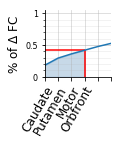

In [55]:
# Show that
n_show = 6
top_x = 4
f_width = 40/25.4
f_height = 48/25.4
f = plt.figure(figsize=(f_width,f_height), constrained_layout=True)
#ax = f.add_axes([0.4, 0.5, 0.6, 0.5])
ax = f.add_subplot(111)
p = ax.plot(range(64), perc_top)
ax.fill_between(np.arange(top_x), 0, perc_top[:top_x], color='steelblue', alpha=0.3)
ax.set_ylim([0, 1.05])
ax.set_yticks(np.arange(0,1,0.1), minor=True)
ax.set_xlim([0, n_show-1])
ax.set_xticks(range(n_show))
ax.vlines(top_x-1, 0, perc_top[top_x-1] , color='red')
ax.hlines(perc_top[top_x-1], 0, top_x-1, color='red')
#tmp = ax.set_xticklabels(label.label.values[ind], rotation=90)
tmp = ax.set_xticklabels(temp_names, rotation=60, fontsize=12, ha="right", rotation_mode="anchor")
ax.set_yticklabels([0, 0.5, 1], fontsize=8)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_ylabel('% of $\Delta$ FC', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.savefig(os.path.join(figure_p, 'figure_1_B.pdf'), dpi=300, transparent=True)